<a href="https://colab.research.google.com/github/laurabersani/MLPNS_LBersani/blob/main/Convlutional_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import numpy as np
import matplotlib as mpl
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [8]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [16]:
#NOTA IMPORTANTE: si può fare load solo perchè precedentemente scaricate le immagini dal notebook https://github.com/laurabersani/MLPNS_LBersani/blob/main/generativeAI/superresolve_aenc_faces.ipynb
imgs = np.load("data/faces_saved.npy")
imgs.shape
#Osservo che la dimensione è già corretta

(1441, 70, 70, 1)

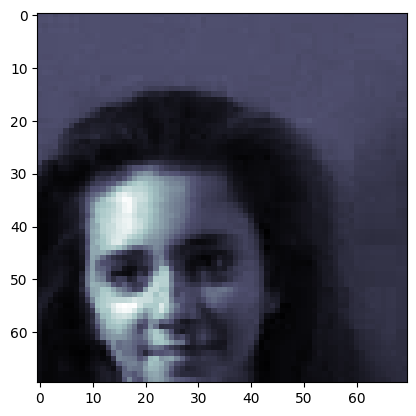

In [13]:
pl.imshow(imgs[10,:,:,0], cmap='bone')

##Costruzione del modello
- Convlutional 64 neuroni (immagine 70x70), con mappa 5x5
- Pooling (con mappa 2x2)
- Layer Conv 32 neuroni 
- Pooling
- Layer Conv 16 neuroni
- Pooling
- Layer conv 32
- pool
- Layer conv 64

In [18]:
layer64 = keras.layers.Conv2D(64, #n di neuroni
                             kernel_size=(5, 5), #dim della mappa di convoluzione 
                             padding="same", 
                             activation="relu", 
                             input_shape=(70, 70, 1), #needed in the first layer only
                             kernel_regularizer=keras.regularizers.l2(0.001))

layermp = keras.layers.MaxPool2D(2)

layer32 = keras.layers.Conv2D(32, 
                             kernel_size=(5, 5),
                             padding="same", 
                             activation="relu", 
                             kernel_regularizer=keras.regularizers.l2(0.001))

#layer4 = keras.layers.MaxPool2D(2)

layer16 = keras.layers.Conv2D(16, 
                             kernel_size=(5, 5),
                             padding="same", 
                             activation="relu", 
                             kernel_regularizer=keras.regularizers.l2(0.001))

#layer7 = keras.layers.MaxPool2D(2)
layer5=keras.layers.Flatten()

layer6 = keras.layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))



layer7 = keras.layers.Dense(64, activation="softmax")

layer8 = keras.layers.Dense(70*70, activation='sigmoid')

layers=[layer64, layermp, layer32, layermp, layer16, layer5, layer6, layer7, layer8]

model = keras.Sequential(layers)


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        51232     
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 16)        12816     
                                                                 
 flatten (Flatten)           (None, 4624)              0         
                                                                 
 dense (Dense)               (None, 32)                148000    
                                                        

In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(imgs, imgs.flatten(), test_size = .20, random_state=1)

In [29]:
#L'output sarà un array, quindi devo appiattire le immagini di output
Ytrain = Ytrain.reshape(len(Ytrain), np.prod(Ytrain.shape[1:]))
Ytest = Ytest.reshape(len(Ytest), np.prod(Ytest.shape[1:]))

In [30]:
Ytrain.shape, Ytest.shape

((1152, 4900), (289, 4900))

In [68]:
model.compile(optimizer='adamax', loss='mse',
              metrics=['mae', 'acc'])

In [32]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_mae',
                         patience=10,
                         min_delta=0.0001)

In [72]:
history = model.fit( Xtrain, Ytrain, epochs=100000, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1,
                    callbacks=[callback])

Epoch 1/100000
 4/72 [>.............................] - ETA: 22s - loss: 0.0311 - mae: 0.1327 - acc: 0.0000e+00

KeyboardInterrupt: ignored

In [81]:
model.save("data/convlutional32_16_8.h5")

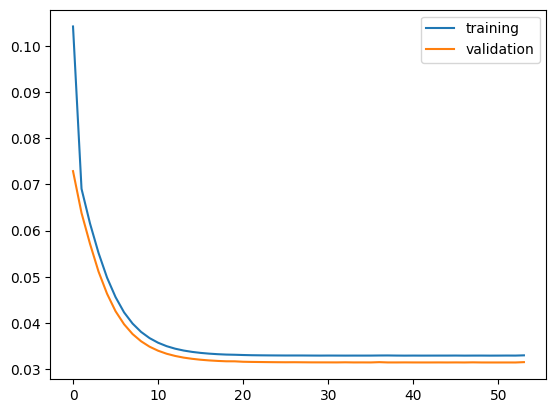

In [65]:
pl.plot(np.array(history.history['loss']), label="training")
pl.plot(np.array(history.history['val_loss']), label="validation")
pl.legend()

è molto liscia. Il che è un bene perchè vuol dire che il learning rate è adeguato, ma anche un male perchè vuol dire che abbiamo spazio per imparare. 

In [42]:
imgsout=model.predict(Xtest)

10/10 [==============================] - 3s 244ms/step


In [43]:
imgsout.shape

(289, 4900)

In [44]:
imgs_o=imgsout.reshape(imgsout.shape[0],70,70)

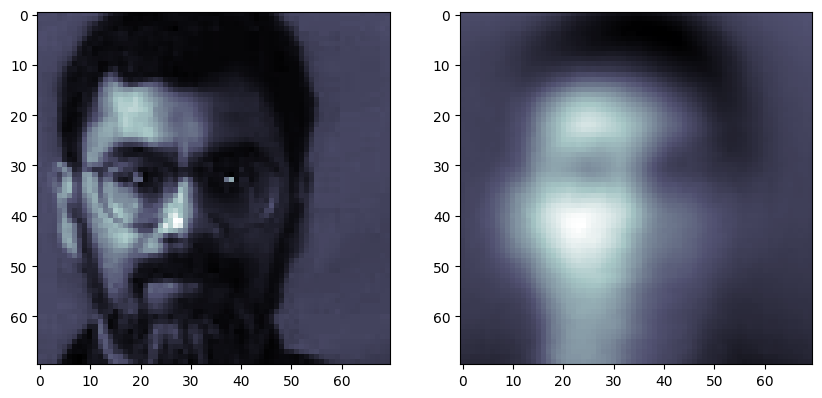

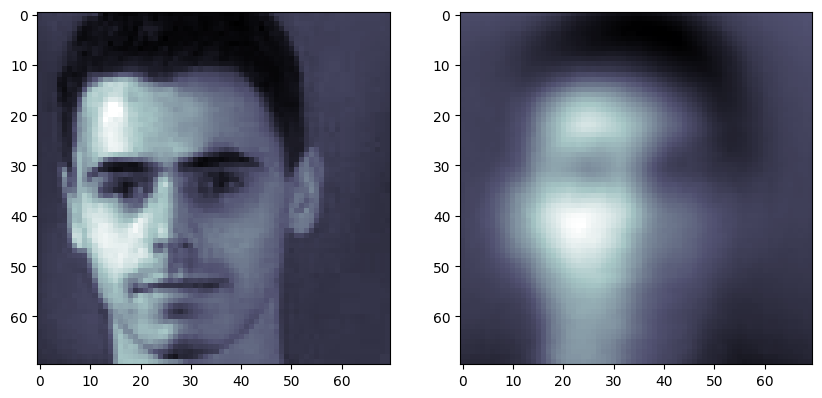

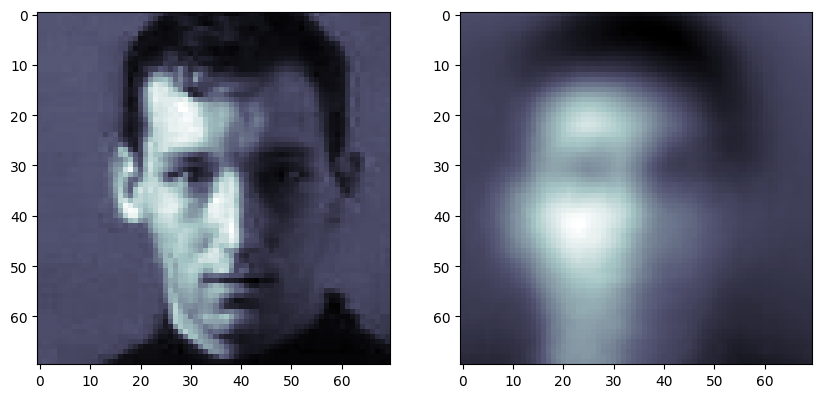

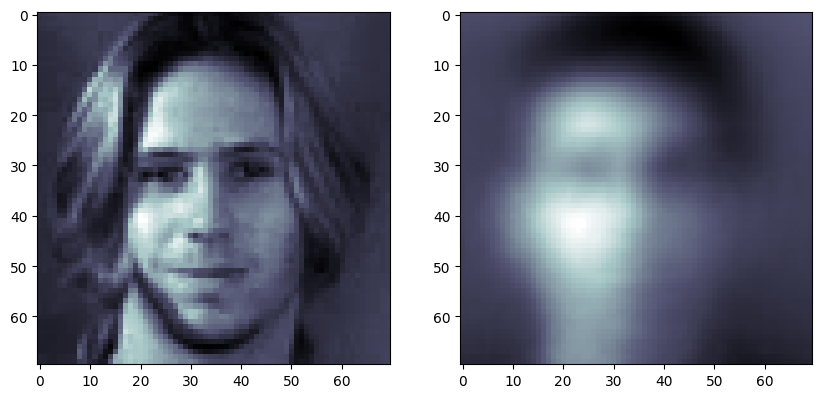

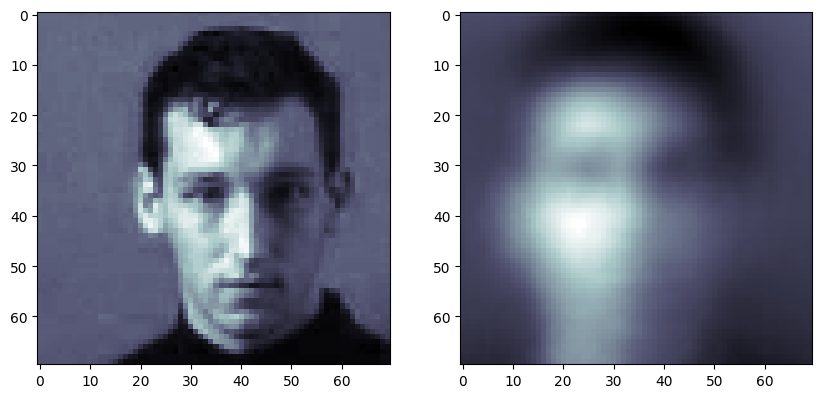

In [59]:
for i in [0, 5, 10, 15,20]:

  fig=pl.figure(figsize=(10,5))
  ax1=fig.add_subplot(121)
  ax1.imshow(Xtest[i, :,:], cmap='bone')
  ax2=fig.add_subplot(122)
  ax2.imshow(imgs_o[i,:,:], cmap='bone')

Sono venuti tutti uguali! Ad un qualcosa di fumoso che è il valore medio. 
Proviamo a cambiare il learning rate. 

Oppure posso pravare a fare una rete un po' più complessa. 

256-->128-->64-->128-->256

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [78]:
model2 = keras.Sequential()
model2.add(Conv2D(128, kernel_size=(5, 5), 
                  padding="same", activation="relu", 
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model2.add(MaxPooling2D(2))
model2.add(Conv2D(64, kernel_size=(5, 5), 
                  padding="same", activation="relu", 
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model2.add(MaxPooling2D(2))
model2.add(Conv2D(32, kernel_size=(5, 5), 
                  padding="same", activation="relu", name="bottleneck",
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model2.add(Flatten())
model2.add(Dense(64, activation='relu' ))
model2.add(Dense(128, activation='softmax'))
model2.add(Dense(70*70, activation='sigmoid'))

In [79]:
model2.compile(optimizer='adamax', loss='mse',
              metrics=['mae', 'acc'])

In [80]:
history2 = model2.fit( Xtrain, Ytrain, epochs=100000, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1,
                    callbacks=[callback])

Epoch 1/100000
72/72 [==============================] - 103s 1s/step - loss: 0.1011 - mae: 0.2477 - acc: 0.0026 - val_loss: 0.0726 - val_mae: 0.2378 - val_acc: 0.0000e+00
Epoch 2/100000
72/72 [==============================] - 76s 1s/step - loss: 0.0692 - mae: 0.2317 - acc: 0.0043 - val_loss: 0.0640 - val_mae: 0.2218 - val_acc: 0.0000e+00
Epoch 3/100000
72/72 [==============================] - 76s 1s/step - loss: 0.0614 - mae: 0.2160 - acc: 0.0026 - val_loss: 0.0567 - val_mae: 0.2062 - val_acc: 0.0000e+00
Epoch 4/100000
72/72 [==============================] - 76s 1s/step - loss: 0.0549 - mae: 0.2020 - acc: 8.6806e-04 - val_loss: 0.0510 - val_mae: 0.1929 - val_acc: 0.0000e+00
Epoch 5/100000
72/72 [==============================] - 81s 1s/step - loss: 0.0498 - mae: 0.1900 - acc: 0.0026 - val_loss: 0.0464 - val_mae: 0.1815 - val_acc: 0.0000e+00
Epoch 6/100000
72/72 [==============================] - 82s 1s/step - loss: 0.0458 - mae: 0.1799 - acc: 0.0026 - val_loss: 0.0429 - val_mae: 0.17

In [82]:
model.save("data/convlutional64_32_16.h5")

In [83]:
outim2flat=model2.predict(Xtest)

10/10 [==============================] - 6s 503ms/step


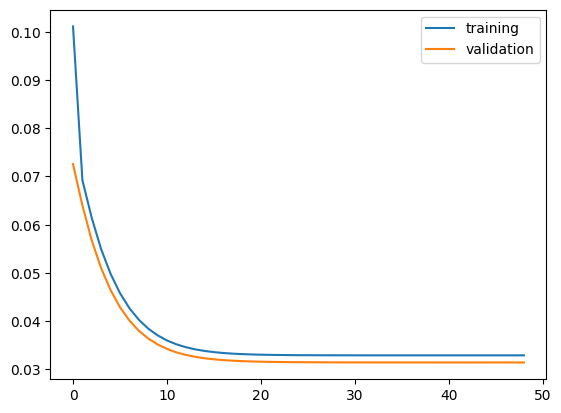

In [87]:
pl.plot(np.array(history2.history['loss']), label="training")
pl.plot(np.array(history2.history['val_loss']), label="validation")
pl.legend()

Sempre molto liscia... 

In [90]:
Outim2flat=model2.predict(Xtest)

10/10 [==============================] - 4s 387ms/step


In [92]:
Outim=Outim2flat.reshape(Outim2flat.shape[0],70, 70)

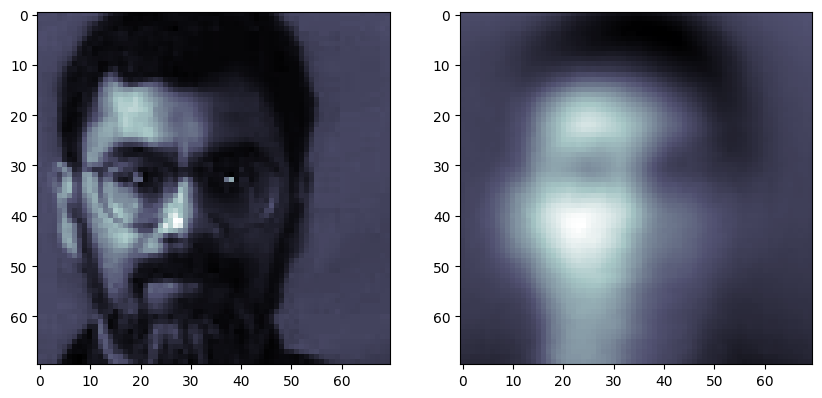

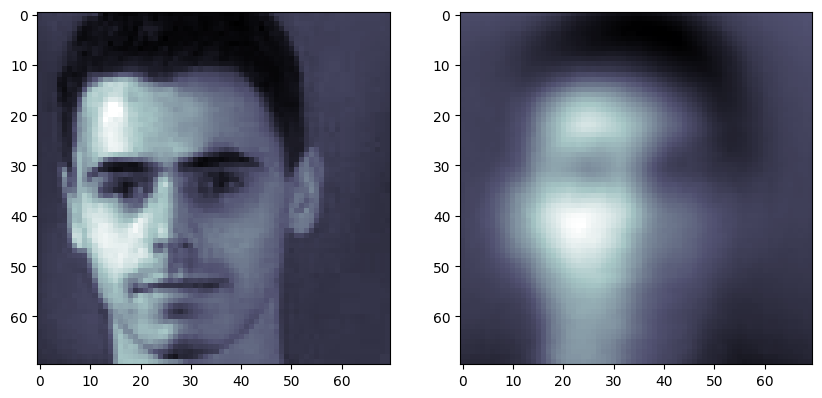

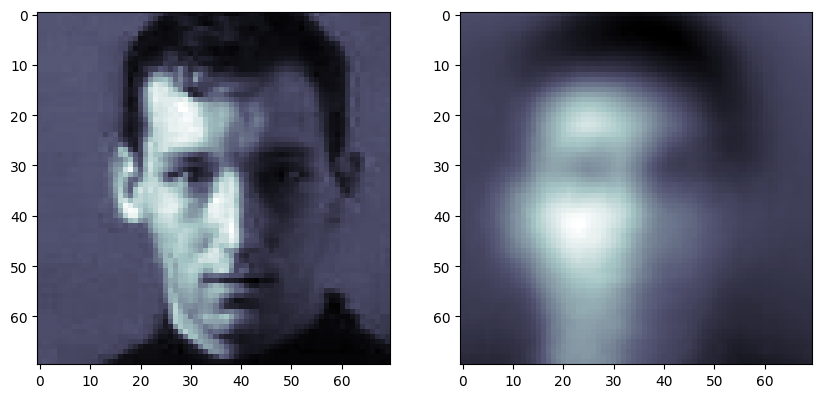

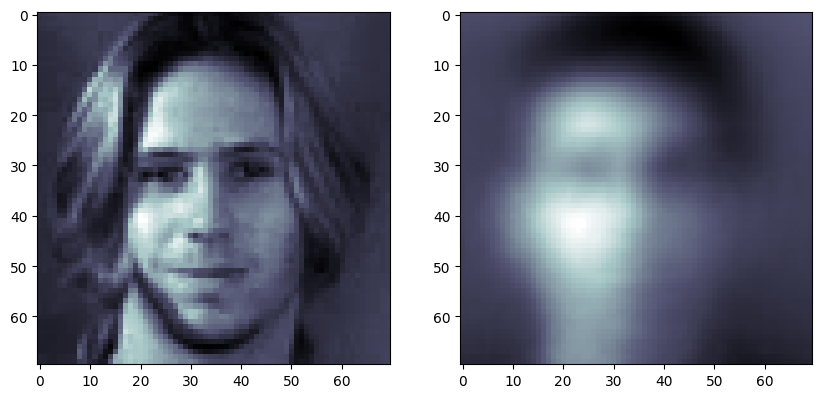

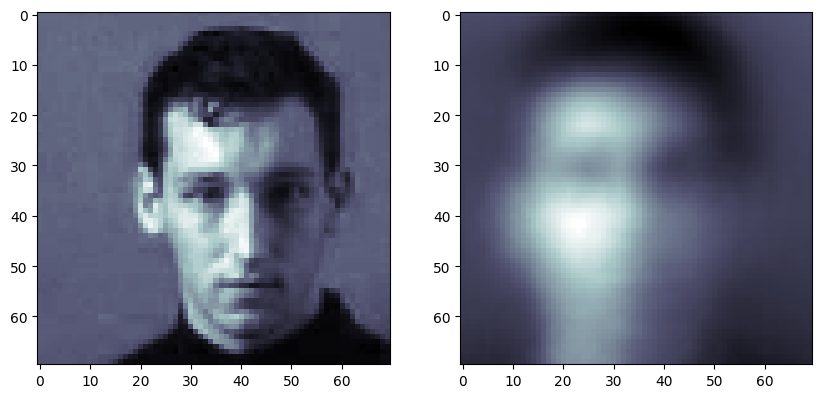

In [93]:
for i in [0, 5, 10, 15,20]:

  fig=pl.figure(figsize=(10,5))
  ax1=fig.add_subplot(121)
  ax1.imshow(Xtest[i, :,:], cmap='bone')
  ax2=fig.add_subplot(122)
  ax2.imshow(imgs_o[i,:,:], cmap='bone')

Non sembra che con più neuroni si sia risolto il problema. Proviamo ad abbassare il learning rate. 

(Usiamo il primo modello che era più rapido)

In [ ]:
from keras import optimizers
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mean_squared_error", optimizer=opt)
history_op = model.fit( Xtrain, Ytrain, epochs=5000, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1,
                    callbacks=[callback])

Epoch 1/5000
72/72 [==============================] - ETA: 0s - loss: 0.0345

72/72 [==============================] - 49s 641ms/step - loss: 0.0345 - val_loss: 0.0319
Epoch 2/5000
72/72 [==============================] - ETA: 0s - loss: 0.0400

72/72 [==============================] - 32s 441ms/step - loss: 0.0400 - val_loss: 0.0361
Epoch 3/5000
72/72 [==============================] - ETA: 0s - loss: 0.0356

72/72 [==============================] - 33s 465ms/step - loss: 0.0356 - val_loss: 0.0317
Epoch 4/5000
72/72 [==============================] - ETA: 0s - loss: 0.0368

72/72 [==============================] - 32s 449ms/step - loss: 0.0368 - val_loss: 0.0365
Epoch 5/5000
72/72 [==============================] - ETA: 0s - loss: 0.0346

72/72 [==============================] - 31s 433ms/step - loss: 0.0346 - val_loss: 0.0339
Epoch 6/5000
72/72 [==============================] - ETA: 0s - loss: 0.0334

72/72 [==============================] - 30s 415ms/step - loss: 0.0334 - val_loss: 0.0318
Epoch 7/5000
72/72 [==============================] - ETA: 0s - loss: 0.0337

72/72 [==============================] - 30s 420ms/step - loss: 0.0337 - val_loss: 0.0318
Epoch 8/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 35s 493ms/step - loss: 0.0331 - val_loss: 0.0315
Epoch 9/5000
72/72 [==============================] - ETA: 0s - loss: 0.0333

72/72 [==============================] - 32s 447ms/step - loss: 0.0333 - val_loss: 0.0316
Epoch 10/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 36s 500ms/step - loss: 0.0331 - val_loss: 0.0315
Epoch 11/5000
72/72 [==============================] - ETA: 0s - loss: 0.0334

72/72 [==============================] - 42s 582ms/step - loss: 0.0334 - val_loss: 0.0315
Epoch 12/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 33s 462ms/step - loss: 0.0331 - val_loss: 0.0315
Epoch 13/5000
72/72 [==============================] - ETA: 0s - loss: 0.0342

72/72 [==============================] - 30s 416ms/step - loss: 0.0342 - val_loss: 0.0316
Epoch 14/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 29s 409ms/step - loss: 0.0331 - val_loss: 0.0317
Epoch 15/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 29s 404ms/step - loss: 0.0331 - val_loss: 0.0329
Epoch 16/5000
72/72 [==============================] - ETA: 0s - loss: 0.0342

72/72 [==============================] - 29s 402ms/step - loss: 0.0342 - val_loss: 0.0319
Epoch 17/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 30s 409ms/step - loss: 0.0331 - val_loss: 0.0318
Epoch 18/5000
72/72 [==============================] - ETA: 0s - loss: 0.0337

72/72 [==============================] - 36s 497ms/step - loss: 0.0337 - val_loss: 0.0316
Epoch 19/5000
72/72 [==============================] - ETA: 0s - loss: 0.0332

72/72 [==============================] - 30s 416ms/step - loss: 0.0332 - val_loss: 0.0315
Epoch 20/5000
72/72 [==============================] - ETA: 0s - loss: 0.0335

72/72 [==============================] - 28s 394ms/step - loss: 0.0335 - val_loss: 0.0316
Epoch 21/5000
72/72 [==============================] - ETA: 0s - loss: 0.0333

72/72 [==============================] - 27s 375ms/step - loss: 0.0333 - val_loss: 0.0317
Epoch 22/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 401ms/step - loss: 0.0330 - val_loss: 0.0316
Epoch 23/5000
72/72 [==============================] - ETA: 0s - loss: 0.0333

72/72 [==============================] - 28s 387ms/step - loss: 0.0333 - val_loss: 0.0315
Epoch 24/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 28s 394ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 25/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 28s 397ms/step - loss: 0.0331 - val_loss: 0.0315
Epoch 26/5000
72/72 [==============================] - ETA: 0s - loss: 0.0334

72/72 [==============================] - 27s 379ms/step - loss: 0.0334 - val_loss: 0.0318
Epoch 27/5000
72/72 [==============================] - ETA: 0s - loss: 0.0332

72/72 [==============================] - 29s 397ms/step - loss: 0.0332 - val_loss: 0.0315
Epoch 28/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 28s 396ms/step - loss: 0.0330 - val_loss: 0.0316
Epoch 29/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 26s 357ms/step - loss: 0.0331 - val_loss: 0.0315
Epoch 30/5000
72/72 [==============================] - ETA: 0s - loss: 0.0335

72/72 [==============================] - 27s 381ms/step - loss: 0.0335 - val_loss: 0.0315
Epoch 31/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 28s 387ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 32/5000
72/72 [==============================] - ETA: 0s - loss: 0.0340

72/72 [==============================] - 27s 377ms/step - loss: 0.0340 - val_loss: 0.0319
Epoch 33/5000
72/72 [==============================] - ETA: 0s - loss: 0.0333

72/72 [==============================] - 27s 377ms/step - loss: 0.0333 - val_loss: 0.0315
Epoch 34/5000
72/72 [==============================] - ETA: 0s - loss: 0.0340

72/72 [==============================] - 25s 344ms/step - loss: 0.0340 - val_loss: 0.0316
Epoch 35/5000
72/72 [==============================] - ETA: 0s - loss: 0.0334

72/72 [==============================] - 26s 365ms/step - loss: 0.0334 - val_loss: 0.0316
Epoch 36/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 27s 375ms/step - loss: 0.0331 - val_loss: 0.0315
Epoch 37/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 26s 366ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 38/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 26s 359ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 39/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 25s 346ms/step - loss: 0.0331 - val_loss: 0.0314
Epoch 40/5000
72/72 [==============================] - ETA: 0s - loss: 0.0344

72/72 [==============================] - 27s 370ms/step - loss: 0.0344 - val_loss: 0.0320
Epoch 41/5000
72/72 [==============================] - ETA: 0s - loss: 0.0332

72/72 [==============================] - 26s 361ms/step - loss: 0.0332 - val_loss: 0.0315
Epoch 42/5000
72/72 [==============================] - ETA: 0s - loss: 0.0333

72/72 [==============================] - 24s 341ms/step - loss: 0.0333 - val_loss: 0.0316
Epoch 43/5000
72/72 [==============================] - ETA: 0s - loss: 0.0332

72/72 [==============================] - 25s 344ms/step - loss: 0.0332 - val_loss: 0.0316
Epoch 44/5000
72/72 [==============================] - ETA: 0s - loss: 0.0333

72/72 [==============================] - 26s 367ms/step - loss: 0.0333 - val_loss: 0.0332
Epoch 45/5000
72/72 [==============================] - ETA: 0s - loss: 0.0334

72/72 [==============================] - 26s 362ms/step - loss: 0.0334 - val_loss: 0.0317
Epoch 46/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 24s 328ms/step - loss: 0.0331 - val_loss: 0.0316
Epoch 47/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 25s 344ms/step - loss: 0.0331 - val_loss: 0.0316
Epoch 48/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 25s 353ms/step - loss: 0.0330 - val_loss: 0.0316
Epoch 49/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 24s 333ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 50/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 25s 339ms/step - loss: 0.0331 - val_loss: 0.0321
Epoch 51/5000
72/72 [==============================] - ETA: 0s - loss: 0.0331

72/72 [==============================] - 25s 348ms/step - loss: 0.0331 - val_loss: 0.0315
Epoch 52/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 25s 344ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 53/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 24s 332ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 54/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 25s 348ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 55/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 24s 339ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 56/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 24s 327ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 57/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 26s 363ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 58/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 28s 384ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 59/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 25s 342ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 60/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 25s 339ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 61/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 26s 358ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 62/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 25s 351ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 63/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 24s 333ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 64/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 26s 355ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 65/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 25s 354ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 66/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 26s 363ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 67/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 27s 374ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 68/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 26s 360ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 69/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 26s 359ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 70/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 25s 347ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 71/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 26s 356ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 72/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 28s 384ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 73/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 399ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 74/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 30s 415ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 75/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 409ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 76/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 28s 394ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 77/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 27s 373ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 78/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 27s 379ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 79/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 410ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 80/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 406ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 81/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 403ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 82/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 405ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 83/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 401ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 84/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 398ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 85/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 400ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 86/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 27s 370ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 87/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 27s 369ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 88/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 27s 376ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 89/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 27s 379ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 90/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 397ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 91/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 33s 464ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 92/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 34s 471ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 93/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 34s 475ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 94/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 34s 474ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 95/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 35s 487ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 96/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 28s 391ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 97/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 399ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 98/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 406ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 99/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 402ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 100/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 398ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 101/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 404ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 102/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 402ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 103/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 29s 399ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 104/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 28s 385ms/step - loss: 0.0330 - val_loss: 0.0315
Epoch 105/5000
72/72 [==============================] - ETA: 0s - loss: 0.0330

72/72 [==============================] - 28s 380ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 106/5000
12/72 [====>.........................] - ETA: 30s - loss: 0.0319

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-94-df5716543934>", line 4, in <cell line: 4>
    history_op = model.fit( Xtrain, Ytrain, epochs=5000,
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 894, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/po